In [18]:
from ROOT import TFile, TTree, TH1F, TCanvas
#from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
from utils import rootnotes
from utils import rootprint
import numpy as np

In [12]:
%%rootprint

inputFile = TFile("../out.root")
tree = inputFile.Get("event")
tree.Print()

******************************************************************************
*Tree    :event     : Tree with event info                                   *
*Entries :    20000 : Total =         7507845 bytes  File  Size =    4737914 *
*        :          : Tree compression factor =   1.58                       *
******************************************************************************
*Br    0 :MET       : MET/D                                                  *
*Entries :    20000 : Total  Size=     160900 bytes  File Size  =      91510 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.75     *
*............................................................................*
*Br    1 :HT        : HT/D                                                   *
*Entries :    20000 : Total  Size=     160890 bytes  File Size  =     100406 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.60     *
*...................................................

In [28]:
hMET = TH1F("MET", "MET", 25, 0. ,5000.)
hHT  = TH1F("HT", "H_{T}", 30, 2000. ,14000.)
hJet_Pt         = []
hJet_MET_DeltaR = []
hCAJet_Pt       = []
hCAJet_Mass     = []
hFHTop_Pt       = []
hFHTop_Mass     = []
for i in range(4):
    hJet_Pt.append(TH1F("Jet"+str(i+1)+"_Pt", "p_{T} of j_{"+str(i+1)+"}", 50, 0., 5000.-1000.*i))
    hJet_MET_DeltaR.append(TH1F("Jet"+str(i+1)+"_MET_DeltaR", "#Delta R ( j_{"+str(i+1)+"}, MET )", 30, 0., 6))
    hCAJet_Pt.append(TH1F("CAJet"+str(i+1)+"_Pt", "p_{T} of C/A j_{"+str(i+1)+"}", 50, 0., 5000.-1000.*i))
    hCAJet_Mass.append(TH1F("CAJet"+str(i+1)+"_Mass", "mass of C/A j_{"+str(i+1)+"}", 50, 0., 1000.))
    hFHTop_Pt.append(TH1F("FHTop"+str(i+1)+"_Pt", "p_{T} of top candidate j_{"+str(i+1)+"} (fully-hadronic decay)", 50, 0., 5000.-1000.*i))
    hFHTop_Mass.append(TH1F("FHTop"+str(i+1)+"_Mass", "mass of top candidate j_{"+str(i+1)+"} (fully-hadronic decay)", 50, 0., 600.))

for event in tree:
    hMET.Fill(event.MET)
    hHT.Fill(event.HT)
    for i in range(min(4,event.Jet_Pt.size())):
        hJet_Pt[i].Fill(event.Jet_Pt[i])
        hJet_MET_DeltaR[i].Fill(event.Jet_MET_DeltaR[i])
    for i in range(min(4,event.CAJet_Pt.size())):
        hCAJet_Pt[i].Fill(event.CAJet_Pt[i])
        hCAJet_Mass[i].Fill(event.CAJet_Mass[i])
    # sort by pT and take first 4 hardest jets
    ordering = np.argsort(np.array(event.FHTop_Pt))[::-1][:4]
    for i in range(len(ordering)):
        hFHTop_Pt[i].Fill(event.FHTop_Pt[ordering[i]])
        hFHTop_Mass[i].Fill(event.FHTop_Mass[ordering[i]])

TFile::Append:0: RuntimeWarning: Replacing existing TH1: MET (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: HT (Potential memory leak).


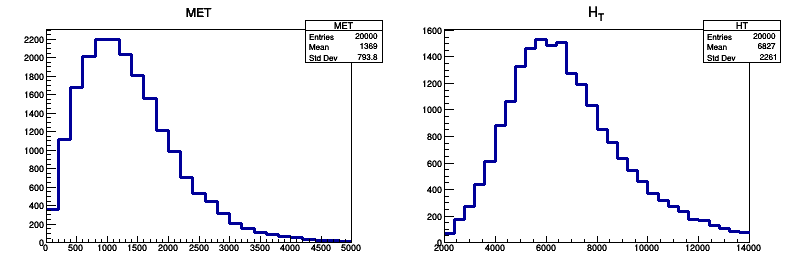

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmp3sweva.png has been created


In [4]:
c1 = rootnotes.canvas(size=(800,300))
c1.Divide(2)
c1.cd(1)
hMET.Draw()
c1.cd(2)
hHT.Draw()
c1

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


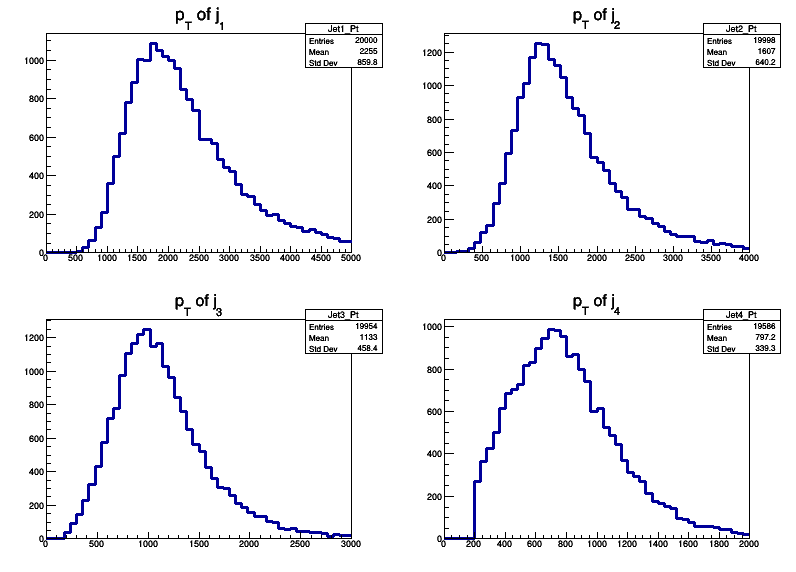

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpUxT977.png has been created


In [5]:
c2=rootnotes.canvas()
c2.Divide(2,2)
for i in range(4):
    c2.cd(i+1)
    hJet_Pt[i].Draw()
c2

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


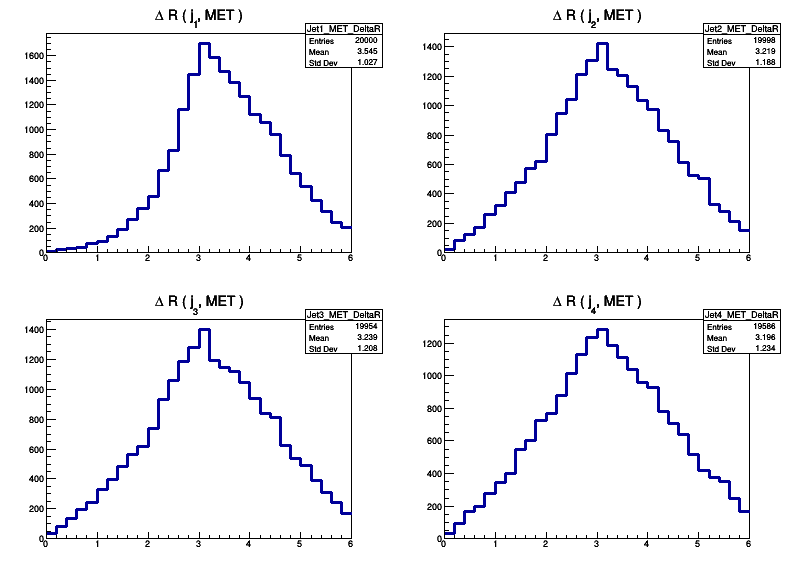

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmp5vFHHe.png has been created


In [6]:
c3=rootnotes.canvas()
c3.Divide(2,2)
for i in range(4):
    c3.cd(i+1)
    hJet_MET_DeltaR[i].Draw()
c3

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


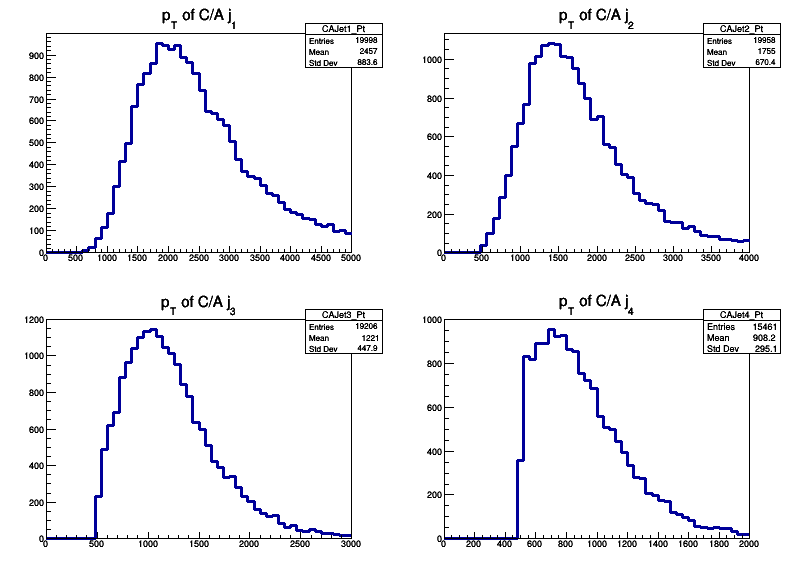

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpp6GIrr.png has been created


In [10]:
c4=rootnotes.canvas()
c4.Divide(2,2)
for i in range(4):
    c4.cd(i+1)
    hCAJet_Pt[i].Draw()
c4

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


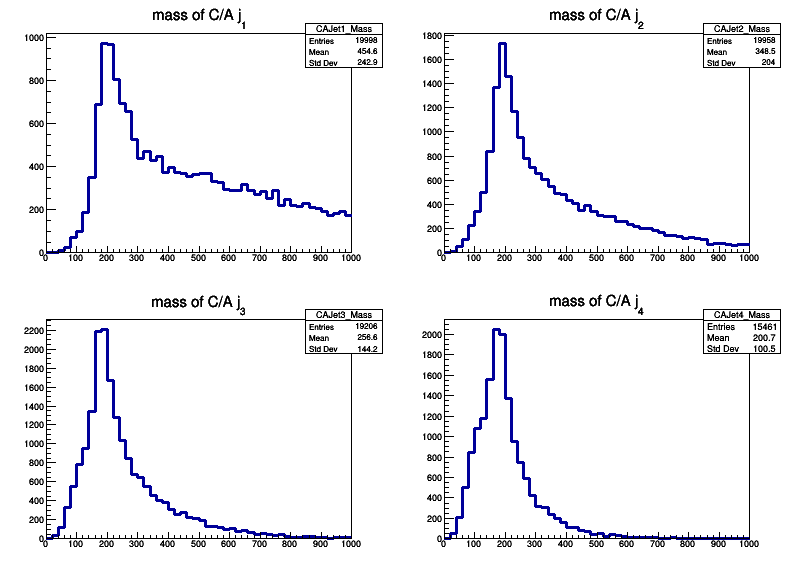

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmp_Pnwmy.png has been created


In [11]:
c5=rootnotes.canvas()
c5.Divide(2,2)
for i in range(4):
    c5.cd(i+1)
    hCAJet_Mass[i].Draw()
c5

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


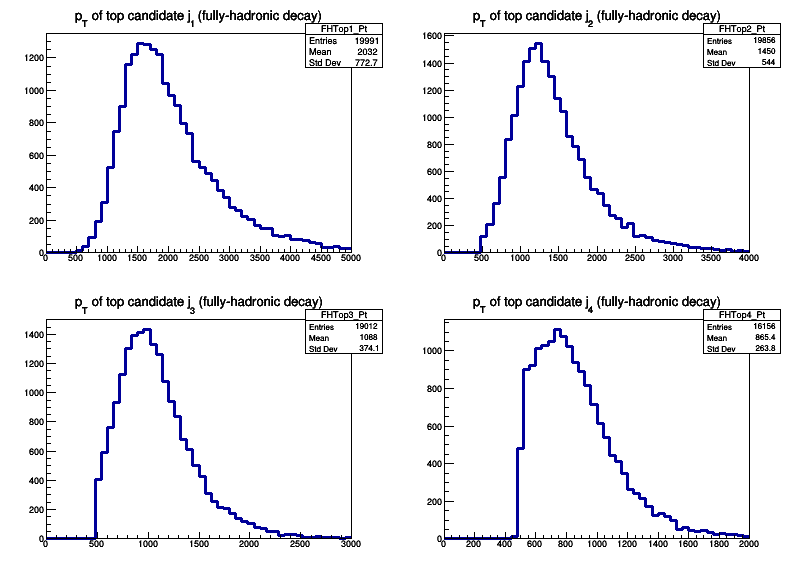

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmp75xfLu.png has been created


In [26]:
c6=rootnotes.canvas()
c6.Divide(2,2)
for i in range(4):
    c6.cd(i+1)
    hFHTop_Pt[i].Draw()
c6

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


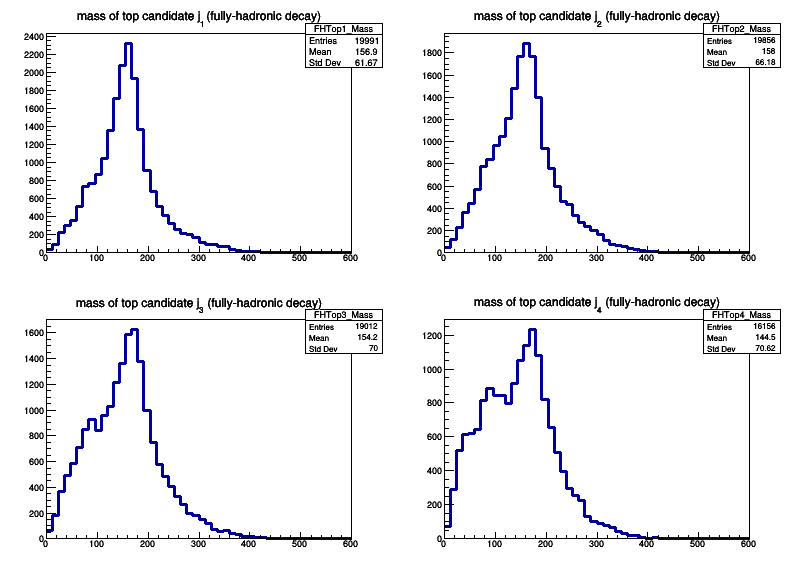

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmp3gy6q2.png has been created


In [29]:
c7=rootnotes.canvas()
c7.Divide(2,2)
for i in range(4):
    c7.cd(i+1)
    hFHTop_Mass[i].Draw()
c7